In [42]:
import numpy as np
from typing import List
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os 
import netCDF4 as nc

Create a X Design matrix made in shape (400*600, 24)
when each row is a grid point and each feature is a model.

In [31]:
import numpy as np
from typing import List

def flatten_models_to_grid_matrix(interpolated_precip_list: List[np.ndarray]) -> np.ndarray:
    """
    Create a design matrix X where each row represents a grid point, and each column 
    (feature) represents the flattened precipitation data from a different model.

    Parameters:
    -----------
    interpolated_precip_list : List[np.ndarray]
        A list of 2D arrays (matrices) with dimensions (400, 600) representing 
        precipitation data from different models. Each matrix corresponds to a different 
        model.

    Returns:
    --------
    np.ndarray
        A 2D array (design matrix X) of shape (240000, num_models), where:
        - Each row corresponds to a specific grid point across all models.
        - Each column corresponds to the precipitation data for that grid point from 
          a particular model.

    Notes:
    ------
    - The output design matrix is of shape (240000, num_models), where:
        - 240,000 = 400 * 600 represents all grid points.
        - num_models is the number of models, i.e., the length of the input list.
    - Each row in the matrix corresponds to a unique grid point from the (400, 600) 
      grid, and each feature (column) corresponds to one of the models.
    """
    
    # Number of models and number of grid points
    num_models = len(interpolated_precip_list)
    num_grid_points = 400 * 600

    # Initialize an empty matrix to store the reshaped data
    X = np.zeros((num_grid_points, num_models))

    # Loop over each model's matrix and reshape it into a vector
    for i, precip_matrix in enumerate(interpolated_precip_list):
        # Reshape each (400, 600) matrix to (240000,) and assign it to the ith column
        X[:, i] = precip_matrix.reshape(-1)

    return X


In [45]:
data_relative_path = os.path.join('..', 'Data')
cmip_models_path_path = os.path.join(data_relative_path,'CMIP6','Precipitation')
interpulated_cmip_path = os.path.join(data_relative_path,'InterpulatedCMIP6_400X600')
CHIRPS_path = os.path.join(data_relative_path,'CHIRPS2')


In [69]:
def get_chirps_flat():
    chirps_dataset = nc.Dataset(f"{CHIRPS_path}/chirps_octobers_middle_east_1981_2010.nc") # CHIRPS_Monthly_precipitation
    chirps_precip_data = np.array(chirps_data_us.variables['precip'][:])
    chirps_2D = np.mean(chirps_precip_data,axis=0)
    flat_chirps_2D= chirps_mat.reshape(-1)
    return flat_chirps_2D

# Flatening the Data and Training the Models

In [72]:
# get correlation and precipitation data in 24-sized list 
models_precipitation : list[np.ndarray] = []
models_correlation : list[np.ndarray] = []
for file in os.listdir(interpulated_cmip_path):
    model_path = os.path.join(interpulated_cmip_path,file)
    model_data = np.load(file_path)
    model_mean_data = np.mean(model_data, axis=0) 
    models_precipitation.append(model_mean_data)


# TODO we need to see how to separate to test and train so it make sense
X_precipitation : np.ndarray = flatten_models_to_grid_matrix(models_precipitation)
# X_correlation : np.ndarray = flatten_models_to_grid_matrix(models_correlation)

y_precipitation : np.ndarray = np.mean(X_precipitation, axis=1)
# y_correlation : np.ndarray = np.mean(X_correlation, axis=1)
y_chirps = get_chirps_flat()



reg_model_precipitation = LinearRegression()
# reg_model_correlation = LinearRegression()
reg_model_chirps = LinearRegression()

reg_model_precipitation.fit(X_precipitation, y_precipitation)
# reg_model_correlation.fit(X_correlation, y_correlation)
reg_model_chirps.fit(X_precipitation, y_chirps)


LinearRegression()

In [68]:
y_chirps.shape

(240000,)

# coefficient evaluetion

In [73]:

def plot_coefficients(coefficients: np.ndarray, model_names: List[str], title: str):
    """
    Plot the coefficients of the regression model.

    Parameters:
    -----------
    coefficients : np.ndarray
        The regression coefficients for each model.
        
    model_names : List[str]
        The names or labels of the models corresponding to the coefficients.

    title : str
        Title of the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, coefficients, color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title(title)
    plt.show()

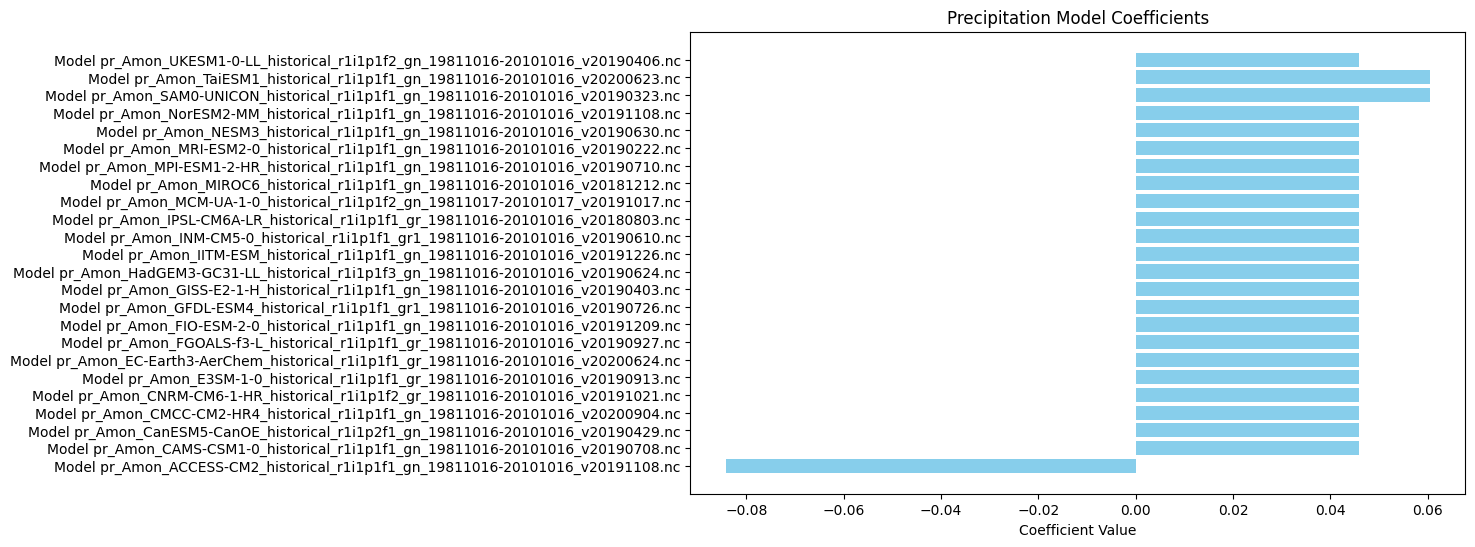

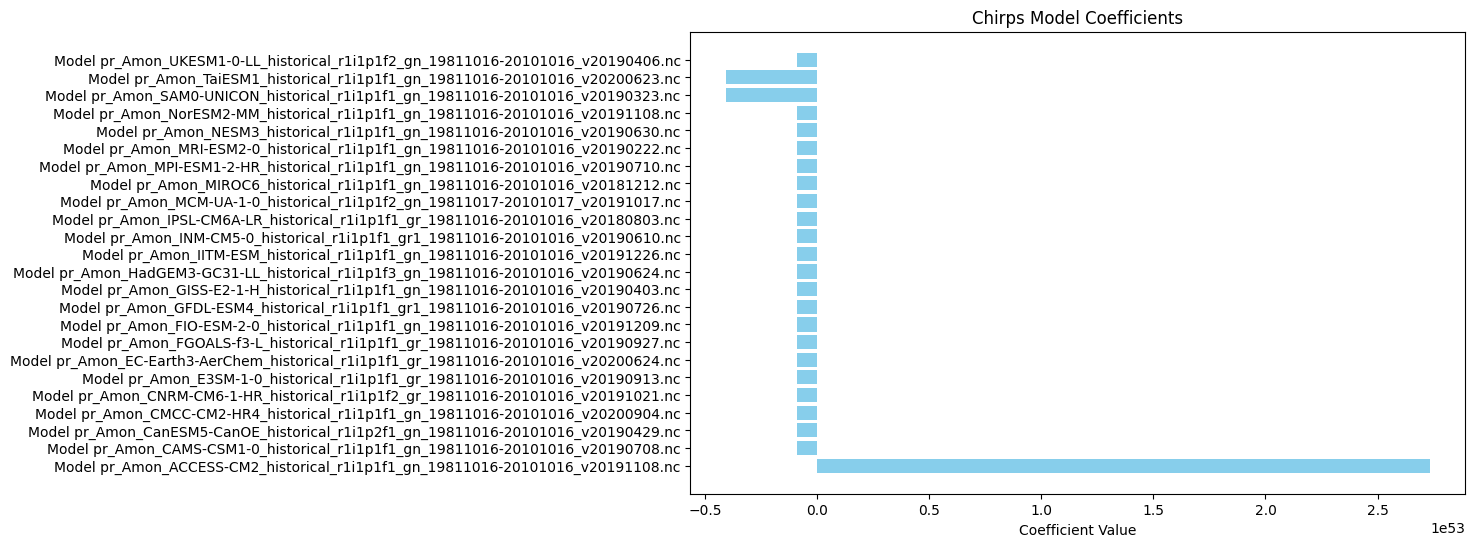

In [76]:
CMIP_PATH = os.path.join('..','Data','CMIP6','Precipitation')
model_names = [f'Model {model_name}' for model_name in os.listdir(CMIP_PATH)]  # Replace with actual model names if available
precipitation_coefficients = reg_model_precipitation.coef_
# correlation_coefficients = reg_model_precipitation.coef_
chirps_coefficients = reg_model_chirps.coef_


plot_coefficients(precipitation_coefficients, model_names, 'Precipitation Model Coefficients')
# plot_coefficients(correlation_coefficients, model_names, 'Correlation Model Coefficients')
plot_coefficients(chirps_coefficients, model_names, 'Chirps Model Coefficients')
